In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
%matplotlib inline


In [45]:
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('Reds')


In [46]:
df = pd.read_csv("/Users/app/Desktop/20180528_mergedv2_small.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 36 columns):
id                            1047 non-null int64
inThePocket                   1047 non-null int64
inTheAngle                    1047 non-null int64
inTheImpactAngle              1047 non-null int64
env_HookStart                 1047 non-null int64
env_HookEnd                   1047 non-null int64
env_HookShape                 1047 non-null int64
env_HookPower                 1047 non-null float64
env_HookBoard                 1047 non-null float64
env_MaxHookDistance           1047 non-null int64
env_ReadStart                 1047 non-null int64
env_BreakPointDistance        1047 non-null int64
env_TrueBreakPointDistance    1047 non-null int64
env_BreakPointPosition        1047 non-null float64
env_BreakPointLength          1047 non-null int64
env_BoardsCrossed             1047 non-null float64
env_RollBoard                 1047 non-null float64
env_SpeedLossTotal            104

In [48]:
X = df.iloc[:,4:22].values

In [49]:
from sklearn.cluster import KMeans 

In [50]:
from sklearn.metrics import silhouette_score,silhouette_samples


In [51]:
twss = []
sa = []

Text(0, 0.5, 'Total within-cluster sum of squares')

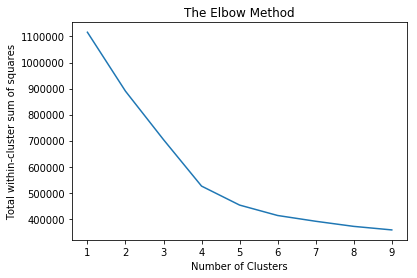

In [52]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

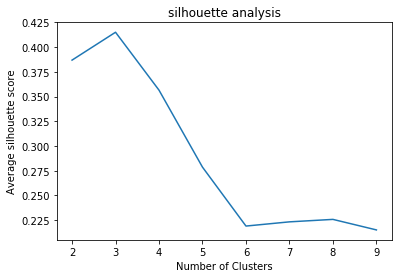

In [53]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

In [54]:
kmeanscluster = KMeans(n_clusters = 5,init = "k-means++")
kmeanscluster.fit(X) 

print(kmeanscluster.cluster_centers_)

[[ 3.14265233e+01  5.76146953e+01  8.61469534e+00  9.62992832e+00
   1.00862007e+01  5.30215054e+01  1.58136201e+01  4.43512545e+01
   4.09551971e+01  7.09211470e+00  1.25394265e+01  2.30200717e+01
   1.37431900e+01  5.15537634e+00  3.04121864e-01  9.45161290e-01
   3.90125448e+00  5.19982079e+01]
 [ 1.58333333e+00  1.83333333e+00 -1.77635684e-15  3.60416667e+00
   1.25833333e+00 -1.42108547e-14  1.02916667e+01  7.10542736e-15
   3.51666667e+01  4.89166667e+00  1.25000000e+00  2.57208333e+01
   1.37083333e+00  4.13333333e+00  3.66666667e-01  7.41666667e-01
   3.01250000e+00  4.31666667e+01]
 [ 2.82909091e+01  5.67000000e+01  1.10090909e+01  5.12909091e+00
   9.91272727e+00  5.40000000e+01  1.74818182e+01  7.81818182e-01
   4.09000000e+01  6.53636364e+00  1.73363636e+01  1.63163636e+01
   2.08609091e+01  5.38090909e+00  2.92727273e-01  1.00090909e+00
   4.09090909e+00  5.34090909e+01]
 [ 2.88846154e+01  5.80807692e+01  1.03346154e+01  7.11269231e+00
   7.22730769e+00  5.49192308e+01  1.

In [70]:
Ypreds=kmeans.predict(X)
print(Ypreds)

[0 0 0 ... 7 7 0]


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)


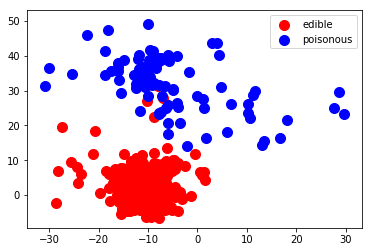

In [67]:
plt.scatter(pca_2d[Ypreds == 0, 0], pca_2d[Ypreds == 0, 1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(pca_2d[Ypreds == 1, 0], pca_2d[Ypreds == 1, 1], s = 100, c = 'blue', label = 'cluster2')
plt.legend()